## Pandas with some seaborn

#### Topics covered:


- the dataframe: basic properties and manipulations
- IO
- intermediate dataframe manipulation
- visualization with Seaborn
- my opinion of Pandas has actually improved significantly since last year :o

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pet_data = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)

In [3]:
pet_data

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [4]:
pet_data.head()

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False


In [5]:
pet_data.describe()

,weight
count,7.000000
mean,10.571429
std,5.652644
min,1.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,20.000000


#### accessing data: loc vs. iloc

In [7]:
pet_sub_data = pet_data.iloc[2:4, :2]
pet_sub_data
#note index does not reset - can be confusing!

,animal,size
2,cat,M
3,fish,M


In [9]:
pet_sub_data.iloc[1]

animal    fish
size         M
Name: 3, dtype: object

In [7]:
pet_data.loc[2:4, ["animal", "size"]]

#why is the slice suddenly inclusive jfc pandas

,animal,size
2,cat,M
3,fish,M
4,dog,M


In [10]:
pet_data.loc[pet_data["weight"] > 10, ["animal", "weight", "adult"]]

,animal,weight,adult
2,cat,11,False
4,dog,20,False
5,cat,12,True
6,cat,12,True


### IO with Pandas

In [12]:
tennis_data = pd.read_csv("tennis_example.csv")

In [13]:
tennis_data

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,B365W,B365L,CBW,CBL,EXW,EXL,IWW,IWL,PSW,PSL
0,6,Melbourne,Australian Open,19/01/04,Grand Slam,Outdoor,Hard,1st Round,5,Davydenko N.,...,3.750,1.250,3.75,1.25,3.98,1.22,NaN,NaN,4.150,1.274
1,6,Melbourne,Australian Open,19/01/04,Grand Slam,Outdoor,Hard,1st Round,5,Guccione C.,...,1.440,2.620,1.40,2.85,1.42,2.75,NaN,NaN,1.444,2.950
2,6,Melbourne,Australian Open,19/01/04,Grand Slam,Outdoor,Hard,1st Round,5,Ginepri R.,...,1.200,4.333,1.18,4.65,1.14,5.19,NaN,NaN,1.213,4.950
3,6,Melbourne,Australian Open,19/01/04,Grand Slam,Outdoor,Hard,1st Round,5,Chela J.I.,...,1.333,3.250,NaN,NaN,1.28,3.46,NaN,NaN,1.308,3.750
4,6,Melbourne,Australian Open,19/01/04,Grand Slam,Outdoor,Hard,1st Round,5,Beck K.,...,2.000,1.727,1.90,1.85,1.80,1.95,NaN,NaN,1.877,1.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,6,Melbourne,Australian Open,28/01/04,Grand Slam,Outdoor,Hard,Quarterfinals,5,Ferrero J.C.,...,1.286,3.500,1.35,3.20,1.30,3.34,1.25,3.2,1.352,3.490
123,6,Melbourne,Australian Open,28/01/04,Grand Slam,Outdoor,Hard,Quarterfinals,5,Federer R.,...,1.533,2.375,1.55,2.45,1.60,2.40,1.40,2.5,1.613,2.450
124,6,Melbourne,Australian Open,29/01/04,Grand Slam,Outdoor,Hard,Semifinals,5,Safin M.,...,3.250,1.364,3.40,1.30,3.35,1.30,2.90,1.3,3.350,1.392
125,6,Melbourne,Australian Open,30/01/04,Grand Slam,Outdoor,Hard,Semifinals,5,Federer R.,...,1.286,3.750,1.25,3.75,1.27,3.81,1.25,3.2,1.299,4.050


In [14]:
tennis_data.dtypes

ATP             int64
Location       object
Tournament     object
Date           object
Series         object
Court          object
Surface        object
Round          object
Best of         int64
Winner         object
Loser          object
WRank           int64
LRank           int64
W1            float64
L1            float64
W2            float64
L2            float64
W3            float64
L3            float64
W4            float64
L4            float64
W5            float64
L5            float64
Wsets         float64
Lsets         float64
Comment        object
B365W         float64
B365L         float64
CBW           float64
CBL           float64
EXW           float64
EXL           float64
IWW           float64
IWL           float64
PSW           float64
PSL           float64
dtype: object

In [15]:
tennis_data["Date"] = pd.to_datetime(tennis_data["Date"], format="%d/%m/%y")

In [16]:
tennis_data

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,B365W,B365L,CBW,CBL,EXW,EXL,IWW,IWL,PSW,PSL
0,6,Melbourne,Australian Open,2004-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Davydenko N.,...,3.750,1.250,3.75,1.25,3.98,1.22,NaN,NaN,4.150,1.274
1,6,Melbourne,Australian Open,2004-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Guccione C.,...,1.440,2.620,1.40,2.85,1.42,2.75,NaN,NaN,1.444,2.950
2,6,Melbourne,Australian Open,2004-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Ginepri R.,...,1.200,4.333,1.18,4.65,1.14,5.19,NaN,NaN,1.213,4.950
3,6,Melbourne,Australian Open,2004-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Chela J.I.,...,1.333,3.250,NaN,NaN,1.28,3.46,NaN,NaN,1.308,3.750
4,6,Melbourne,Australian Open,2004-01-19,Grand Slam,Outdoor,Hard,1st Round,5,Beck K.,...,2.000,1.727,1.90,1.85,1.80,1.95,NaN,NaN,1.877,1.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,6,Melbourne,Australian Open,2004-01-28,Grand Slam,Outdoor,Hard,Quarterfinals,5,Ferrero J.C.,...,1.286,3.500,1.35,3.20,1.30,3.34,1.25,3.2,1.352,3.490
123,6,Melbourne,Australian Open,2004-01-28,Grand Slam,Outdoor,Hard,Quarterfinals,5,Federer R.,...,1.533,2.375,1.55,2.45,1.60,2.40,1.40,2.5,1.613,2.450
124,6,Melbourne,Australian Open,2004-01-29,Grand Slam,Outdoor,Hard,Semifinals,5,Safin M.,...,3.250,1.364,3.40,1.30,3.35,1.30,2.90,1.3,3.350,1.392
125,6,Melbourne,Australian Open,2004-01-30,Grand Slam,Outdoor,Hard,Semifinals,5,Federer R.,...,1.286,3.750,1.25,3.75,1.27,3.81,1.25,3.2,1.299,4.050


- if your data is large, please do not use CSVs. They are slow and large and don't save your data types. There are lots of file formats you can use instead, the most common seems to be parquet.
- DataFrame.to_latex may be of use - for example, I have to generate a fair number of confusion tables for my work. I can generate them in Numpy, add column and index labels when instantiating as a df, then export with to_latex. Extremely extremely situationally useful.
- read_csv can read directly from a Google sheet :o

### intermediate data manipulation

In [17]:
survey_data = pd.read_csv("https://docs.google.com/spreadsheets/d/1j9SmPqO514jTJ1IECrQikXRZ89dEEhQ96SzZoZi7njI/export?format=csv")
survey_data = survey_data.drop(["Email Address", "What is your name?"], axis=1)
survey_data["Timestamp"] = pd.to_datetime(survey_data["Timestamp"])

In [18]:
survey_data

,Timestamp,"On a scale from 1 to 5, where 1 is ""Jesse what the fuck are you talking about"", 3 is ""ohhh yeah I've heard of that"", and 5 is ""*5 minute extremely technical ramble*"", please rate your familiarity with the following representative course topics: [PyCharm]","On a scale from 1 to 5, where 1 is ""Jesse what the fuck are you talking about"", 3 is ""ohhh yeah I've heard of that"", and 5 is ""*5 minute extremely technical ramble*"", please rate your familiarity with the following representative course topics: [argparse]","On a scale from 1 to 5, where 1 is ""Jesse what the fuck are you talking about"", 3 is ""ohhh yeah I've heard of that"", and 5 is ""*5 minute extremely technical ramble*"", please rate your familiarity with the following representative course topics: [Numba]","On a scale from 1 to 5, where 1 is ""Jesse what the fuck are you talking about"", 3 is ""ohhh yeah I've heard of that"", and 5 is ""*5 minute extremely technical ramble*"", please rate your familiarity with the following representative course topics: [matplotlib.gridspec.GridSpec]","On a scale from 1 to 5, where 1 is ""Jesse what the fuck are you talking about"", 3 is ""ohhh yeah I've heard of that"", and 5 is ""*5 minute extremely technical ramble*"", please rate your familiarity with the following representative course topics: [pandas.DataFrame.apply]","Independently of your answers to the above questions, please rate your level of interest in the following topics, also from 1 (lowest) to 5 (highest): [advanced features of base Python]","Independently of your answers to the above questions, please rate your level of interest in the following topics, also from 1 (lowest) to 5 (highest): [defensive programming/workflows]","Independently of your answers to the above questions, please rate your level of interest in the following topics, also from 1 (lowest) to 5 (highest): [code optimization]","Independently of your answers to the above questions, please rate your level of interest in the following topics, also from 1 (lowest) to 5 (highest): [making figures]","Independently of your answers to the above questions, please rate your level of interest in the following topics, also from 1 (lowest) to 5 (highest): [handling non-numerical data]","Any additional comments or suggestions? \n(e.g. ""I have contributed to the Linux kernel but have never programmed in Python"", ""please cover more machine learning I need to know how to programatically query chatGPT to help me train my deep convolutional variational autotransformer"")"
0,2023-08-25 11:04:53,2,2,2,2,1,3,4,2,4,4,NaN
1,2023-08-25 21:11:04,3,1,1,3,3,5,3,3,3,3,NaN
2,2023-08-25 21:13:48,2,1,1,2,3,3,2,3,3,2,"I took a few ""Intro to ML"" classes but was not..."
3,2023-08-25 22:34:14,5,1,1,1,1,3,3,5,5,2,NaN
4,2023-08-26 08:45:50,1,1,1,2,2,5,3,4,4,4,I feel like I’m fairly capable in Python but I...
5,2023-08-28 10:54:44,4,3,1,1,2,5,4,4,3,4,NaN
6,2023-08-29 18:10:52,1,1,1,2,1,4,1,3,5,2,I have a small amount of MATLAB coding experie...
7,2023-09-01 14:30:01,1,1,1,3,3,2,1,1,2,2,NaN
8,2023-09-01 15:18:09,2,2,1,3,3,4,3,4,2,4,NaN


In [19]:
cols = {}
for col in survey_data.columns:
    cols[col] = col.split(" ")[-1]
survey_data = survey_data.rename(columns=cols)

In [20]:
survey_data

,Timestamp,[PyCharm],[argparse],[Numba],[matplotlib.gridspec.GridSpec],[pandas.DataFrame.apply],Python],programming/workflows],optimization],figures],data],"autotransformer"")"
0,2023-08-25 11:04:53,2,2,2,2,1,3,4,2,4,4,NaN
1,2023-08-25 21:11:04,3,1,1,3,3,5,3,3,3,3,NaN
2,2023-08-25 21:13:48,2,1,1,2,3,3,2,3,3,2,"I took a few ""Intro to ML"" classes but was not..."
3,2023-08-25 22:34:14,5,1,1,1,1,3,3,5,5,2,NaN
4,2023-08-26 08:45:50,1,1,1,2,2,5,3,4,4,4,I feel like I’m fairly capable in Python but I...
5,2023-08-28 10:54:44,4,3,1,1,2,5,4,4,3,4,NaN
6,2023-08-29 18:10:52,1,1,1,2,1,4,1,3,5,2,I have a small amount of MATLAB coding experie...
7,2023-09-01 14:30:01,1,1,1,3,3,2,1,1,2,2,NaN
8,2023-09-01 15:18:09,2,2,1,3,3,4,3,4,2,4,NaN


In [22]:
survey_data["early"] = True
survey_data.loc[survey_data["Timestamp"] > pd.to_datetime("8/26/23"), "early"] = False

### Group by: the split-apply-combine paradigm

In [25]:
survey_transformed = survey_data.groupby("early")[survey_data.columns[1:-2]].agg(["mean", "min"])
survey_transformed #              split                                     combine    apply

[PyCharm]     [argparse]     [Numba]     [matplotlib.gridspec.GridSpec]  \
           mean min       mean min    mean min                           mean   
early                                                                           
False       1.8   1       1.60   1    1.00   1                            2.2   
True        3.0   2       1.25   1    1.25   1                            2.0   

          [pandas.DataFrame.apply]     Python]     programming/workflows]      \
      min                     mean min    mean min                   mean min   
early                                                                           
False   1                      2.2   1     4.0   2                    2.4   1   
True    1                      2.0   1     3.5   3                    3.0   2   

      optimization]     figures]     data]      
               mean min     mean min  mean min  
early                                           
False          3.20   1     3.20   2  3.20   2  
True           3.25   2     3.75   3  2.75   2

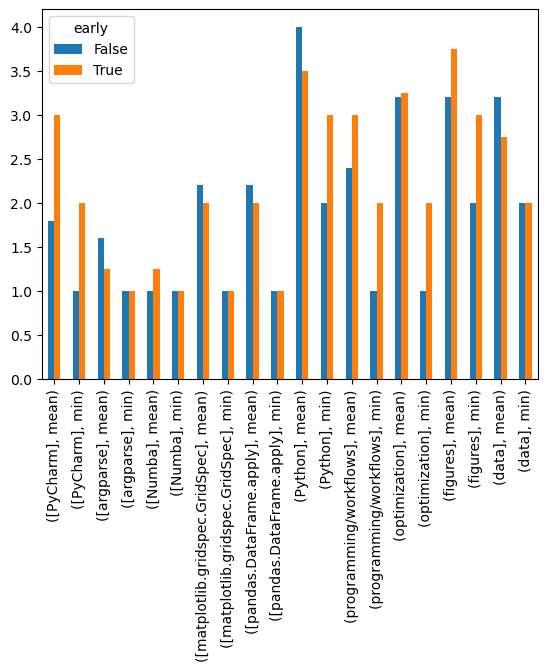

In [26]:
survey_transformed.T.plot(kind="bar")
plt.show()

also, this transformed data is a MultiIndex now! Pandas's way of representing higher dimensional data.

In [39]:
survey_transformed

[PyCharm]     [argparse]     [Numba]     [matplotlib.gridspec.GridSpec]  \
           mean min       mean min    mean min                           mean   
early                                                                           
False       1.8   1       1.60   1    1.00   1                            2.2   
True        3.0   2       1.25   1    1.25   1                            2.0   

          [pandas.DataFrame.apply]     Python]     programming/workflows]      \
      min                     mean min    mean min                   mean min   
early                                                                           
False   1                      2.2   1     4.0   2                    2.4   1   
True    1                      2.0   1     3.5   3                    3.0   2   

      optimization]     figures]     data]      
               mean min     mean min  mean min  
early                                           
False          3.20   1     3.20   2  3.20   2  
True           3.25   2     3.75   3  2.75   2

In [ ]:
survey_transformed.stack(level=-1)

In [40]:
survey_transformed.stack().stack()

C:\Users\agfin\AppData\Local\Temp\ipykernel_18452\1897701938.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  survey_transformed.stack().stack()


early                                      
False  mean  [PyCharm]                         1.80
             [argparse]                        1.60
             [Numba]                           1.00
             [matplotlib.gridspec.GridSpec]    2.20
             [pandas.DataFrame.apply]          2.20
             Python]                           4.00
             programming/workflows]            2.40
             optimization]                     3.20
             figures]                          3.20
             data]                             3.20
       min   [PyCharm]                         1.00
             [argparse]                        1.00
             [Numba]                           1.00
             [matplotlib.gridspec.GridSpec]    1.00
             [pandas.DataFrame.apply]          1.00
             Python]                           2.00
             programming/workflows]            1.00
             optimization]                     1.00
             figures

In [47]:
survey_transformed

[PyCharm]     [argparse]     [Numba]     [matplotlib.gridspec.GridSpec]  \
           mean min       mean min    mean min                           mean   
early                                                                           
False       1.8   1       1.60   1    1.00   1                            2.2   
True        3.0   2       1.25   1    1.25   1                            2.0   

          [pandas.DataFrame.apply]     Python]     programming/workflows]      \
      min                     mean min    mean min                   mean min   
early                                                                           
False   1                      2.2   1     4.0   2                    2.4   1   
True    1                      2.0   1     3.5   3                    3.0   2   

      optimization]     figures]     data]      
               mean min     mean min  mean min  
early                                           
False          3.20   1     3.20   2  3.20   2  
True           3.25   2     3.75   3  2.75   2

In [24]:
islice = pd.IndexSlice
survey_transformed.loc[:, (islice["[PyCharm]":"[Numba]"], "mean")]

,[PyCharm],[argparse],[Numba]
,mean,mean,mean
early,,,
False,1.8,1.60,1.00
True,3.0,1.25,1.25


In [48]:
s = pd.Series(
    [1, 2, 3, 4, 5, 6],
    index=pd.MultiIndex.from_product([["A", "B"], ["c", "d", "e"]]),
)
s

A  c    1
   d    2
   e    3
B  c    4
   d    5
   e    6
dtype: int64

In [26]:
s.loc[[("A", "c"), ("B", "d")]]  # list of tuples

A  c    1
B  d    5
dtype: int64

In [27]:
s.loc[(["A", "B"], ["c", "d"])]  # tuple of lists

A  c    1
   d    2
B  c    4
   d    5
dtype: int64

"tuples go horizontally (traversing levels), lists go vertically (scanning levels)." - https://pandas.pydata.org/docs/user_guide/advanced.html

an alternative for higher-dimensional data: xarray

x.sum('time') would be nice in numpy!!

WARNING: created by geophysicists




an alternative for speed: polars

(though Pandas 3.0 will be MUCH faster thanks to PyArrow)

### a few seaborn things


Seaborn is built around a few different meta-plot-types, each with their own subtypes:
![seaborn_plot_types](https://seaborn.pydata.org/_images/function_overview_8_0.png)

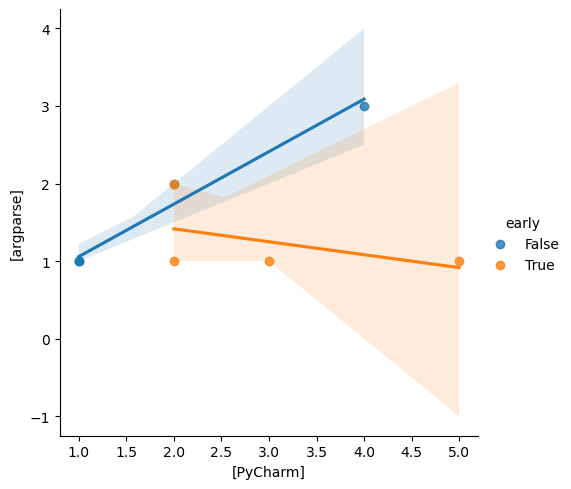

In [29]:
sns.lmplot(data=survey_data, x="[PyCharm]", y="[argparse]", hue="early")
plt.show()

In [31]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


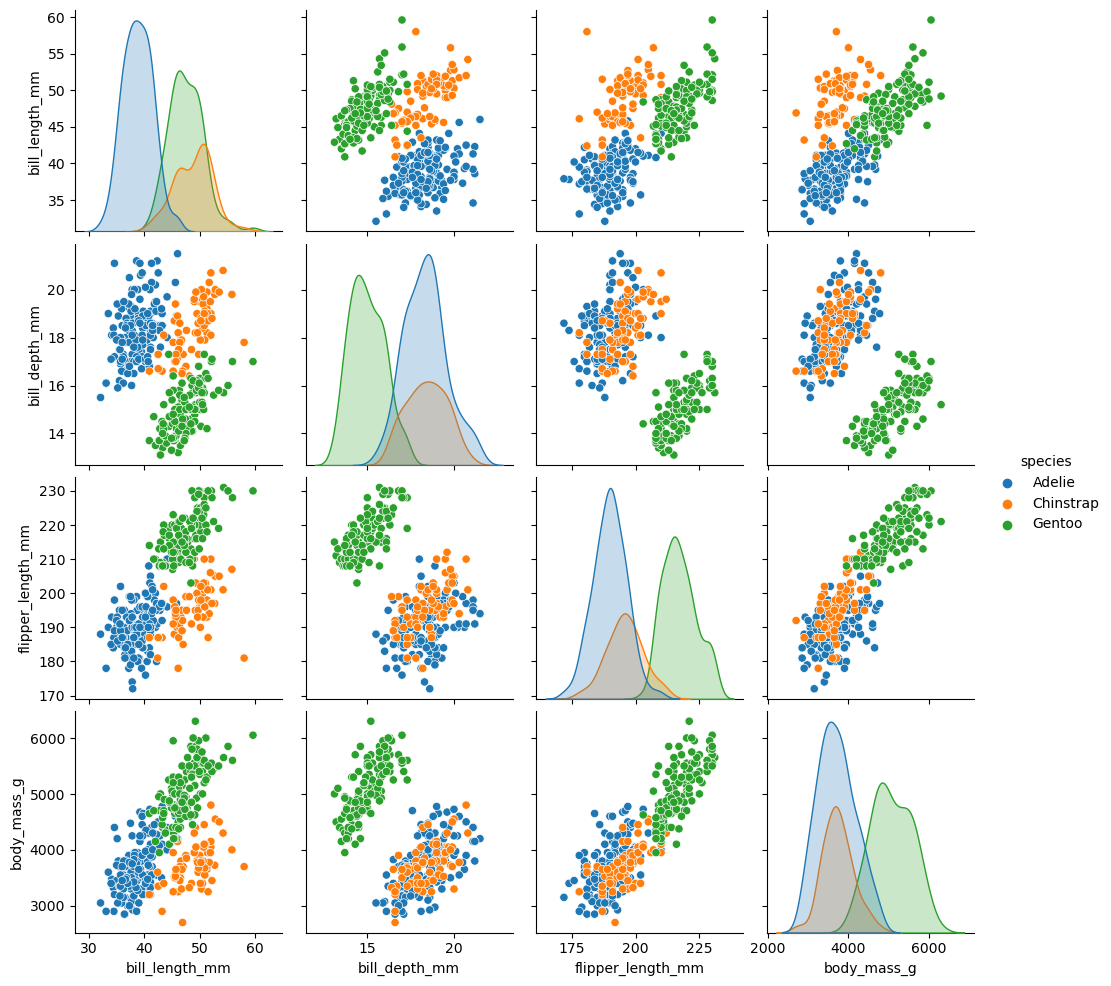

In [32]:
sns.pairplot(penguins, hue="species")
plt.show()

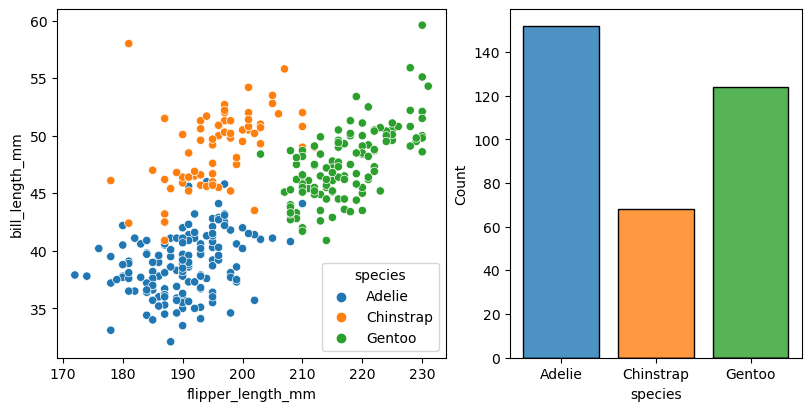

In [33]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]), layout="constrained")
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
plt.show()

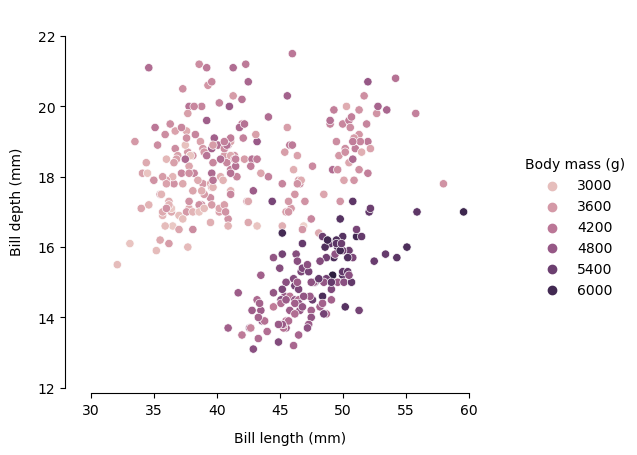

In [34]:
peng_plot = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g")
peng_plot.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
peng_plot.legend.set_title("Body mass (g)")
peng_plot.figure.set_size_inches(6.5, 4.5)
peng_plot.ax.margins(.15)
peng_plot.despine(trim=True)
plt.show()

many more examples can be found at https://seaborn.pydata.org/examples/index.html


a few examples from my work:

![box plot](box_plot.pdf)

![confusion table]